In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torchvision

from lenet import LeNet5


# Constants

In [13]:
dataset_location: str = "data"
batch_size: int = 128
train_validation_split: float = 0.7

# Load data
Load the MNIST dataset from torchvision and apply padding and normalisation as part of the transform.

In [14]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Pad(2),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(177.5, 255.0)    
])

In [15]:
train_validation_data = torchvision.datasets.MNIST(dataset_location, transform=transform, download=True)
train_data, validation_data = torch.utils.data.random_split(train_validation_data, [train_validation_split, 1 - train_validation_split])
test_data = torchvision.datasets.MNIST(dataset_location, train=False, transform=transform, download=True)

In [16]:
def get_loader(dataset: torch.utils.data.Dataset) -> torch.utils.data.DataLoader:
    return torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

train_loader = get_loader(train_data)
validation_loader = get_loader(validation_data)
test_loader = get_loader(test_data)

Class: 2 - two


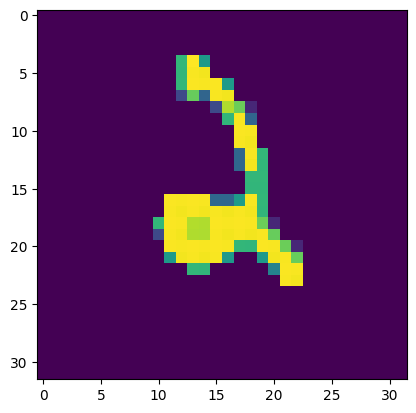

In [33]:
def get_sample() -> tuple[torch.Tensor, str]:
    data = next(iter(train_loader))
    return data[0][0].squeeze(0), train_validation_data.classes[data[1][0]]

image, label = get_sample()
print(f"Class: {label}")
plt.imshow(image);